In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import SGD,Adam
from keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
!unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# LOAD THE DATASET

In [ ]:
train=pd.read_csv("/content/train.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.info(max_cols=785)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Data columns (total 785 columns):
 #    Column    Non-Null Count  Dtype
---   ------    --------------  -----
 0    label     42000 non-null  int64
 1    pixel0    42000 non-null  int64
 2    pixel1    42000 non-null  int64
 3    pixel2    42000 non-null  int64
 4    pixel3    42000 non-null  int64
 5    pixel4    42000 non-null  int64
 6    pixel5    42000 non-null  int64
 7    pixel6    42000 non-null  int64
 8    pixel7    42000 non-null  int64
 9    pixel8    42000 non-null  int64
 10   pixel9    42000 non-null  int64
 11   pixel10   42000 non-null  int64
 12   pixel11   42000 non-null  int64
 13   pixel12   42000 non-null  int64
 14   pixel13   42000 non-null  int64
 15   pixel14   42000 non-null  int64
 16   pixel15   42000 non-null  int64
 17   pixel16   42000 non-null  int64
 18   pixel17   42000 non-null  int64
 19   pixel18   42000 non-null  int64
 20   pixel19   42000 non-null  int64
 21   pixel20   

# SPLITTING THE DATASET

In [ ]:
x=train.drop("label",axis=1)
y=train["label"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=31)

# DECLARE THE MODEL

In [ ]:
model=Sequential()

# DECLARE THE LAYERS(128 NEURONS)

In [ ]:
model.add(Dense(128, activation='relu', input_dim=784))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


# MODEL COMPILATION

In [ ]:
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=['accuracy'])

# FIT THE MODEL

In [ ]:
y_train_ohe=to_categorical(y_train)
y_test_ohe=to_categorical(y_test)

In [ ]:
hist=model.fit(x_train,y_train_ohe,validation_data=(x_test,y_test_ohe),epochs=200,verbose=2)

Epoch 1/200
1050/1050 - 8s - loss: 1.4981 - accuracy: 0.8520 - val_loss: 0.4833 - val_accuracy: 0.8887 - 8s/epoch - 7ms/step
Epoch 2/200
1050/1050 - 5s - loss: 0.3143 - accuracy: 0.9240 - val_loss: 0.3629 - val_accuracy: 0.9146 - 5s/epoch - 5ms/step
Epoch 3/200
1050/1050 - 6s - loss: 0.2343 - accuracy: 0.9384 - val_loss: 0.2736 - val_accuracy: 0.9299 - 6s/epoch - 6ms/step
Epoch 4/200
1050/1050 - 5s - loss: 0.1900 - accuracy: 0.9496 - val_loss: 0.3273 - val_accuracy: 0.9217 - 5s/epoch - 5ms/step
Epoch 5/200
1050/1050 - 6s - loss: 0.1721 - accuracy: 0.9527 - val_loss: 0.1881 - val_accuracy: 0.9506 - 6s/epoch - 6ms/step
Epoch 6/200
1050/1050 - 5s - loss: 0.1493 - accuracy: 0.9584 - val_loss: 0.2019 - val_accuracy: 0.9470 - 5s/epoch - 5ms/step
Epoch 7/200
1050/1050 - 5s - loss: 0.1266 - accuracy: 0.9631 - val_loss: 0.1903 - val_accuracy: 0.9535 - 5s/epoch - 5ms/step
Epoch 8/200
1050/1050 - 6s - loss: 0.1131 - accuracy: 0.9672 - val_loss: 0.1491 - val_accuracy: 0.9614 - 6s/epoch - 6ms/step


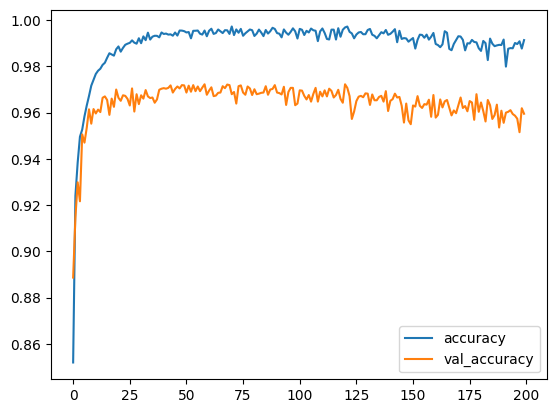

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.legend(['accuracy','val_accuracy'])
plt.show()

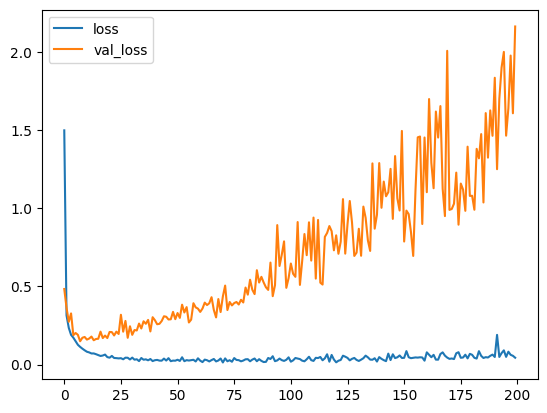

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

# MODEL-2 (256 NEURONS)

In [ ]:
model1=Sequential()

In [ ]:
model1.add(Dense(512, activation='relu', input_dim=784))
model1.add(Dropout(0.2))
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(10, activation='softmax'))

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 10)               

In [ ]:
model1.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [ ]:
result=model1.fit(x_train,y_train_ohe,validation_data=(x_test,y_test_ohe),epochs=200,verbose=2,batch_size=64)

Epoch 1/200
525/525 - 13s - loss: 2.7095 - accuracy: 0.8168 - val_loss: 0.2546 - val_accuracy: 0.9250 - 13s/epoch - 25ms/step
Epoch 2/200
525/525 - 10s - loss: 0.3678 - accuracy: 0.9030 - val_loss: 0.1896 - val_accuracy: 0.9460 - 10s/epoch - 19ms/step
Epoch 3/200
525/525 - 10s - loss: 0.2593 - accuracy: 0.9274 - val_loss: 0.1670 - val_accuracy: 0.9545 - 10s/epoch - 20ms/step
Epoch 4/200
525/525 - 11s - loss: 0.2178 - accuracy: 0.9392 - val_loss: 0.1590 - val_accuracy: 0.9567 - 11s/epoch - 20ms/step
Epoch 5/200
525/525 - 11s - loss: 0.1942 - accuracy: 0.9438 - val_loss: 0.1627 - val_accuracy: 0.9571 - 11s/epoch - 20ms/step
Epoch 6/200
525/525 - 11s - loss: 0.1819 - accuracy: 0.9479 - val_loss: 0.1496 - val_accuracy: 0.9594 - 11s/epoch - 21ms/step
Epoch 7/200
525/525 - 11s - loss: 0.1812 - accuracy: 0.9503 - val_loss: 0.1840 - val_accuracy: 0.9533 - 11s/epoch - 20ms/step
Epoch 8/200
525/525 - 11s - loss: 0.1732 - accuracy: 0.9532 - val_loss: 0.1673 - val_accuracy: 0.9605 - 11s/epoch - 20

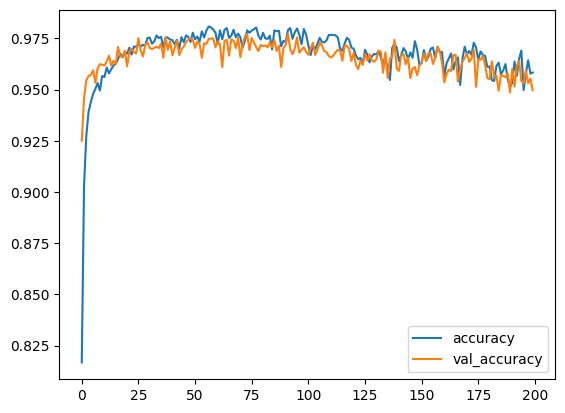

In [ ]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])

plt.legend(['accuracy','val_accuracy'])
plt.show()

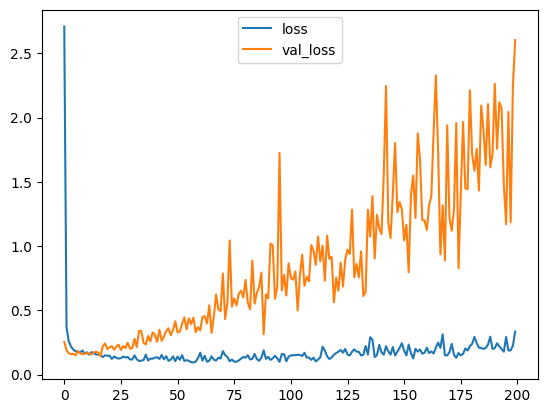

In [ ]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

In [ ]:
ypred=model.predict(x_test)
ypred=ypred>=0.5

263/263 [==============================] - 1s 3ms/step


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ypred,y_test_ohe))

0.9552380952380952
